### 0. API Exploration

This cell contains the function to interact with the IPQualityScore Email and Phone scores

- Get some simple calls and understand its ouputs.

In [ ]:
API_KEY = "oslFVmPZrXePH9rsfK31wcJVrJ9LtjlU" #emailmaurocesar

In [ ]:
import json
import requests
from typing import Union
from datetime import datetime


class Validate(object):
    """
    Class for interacting with the IPQualityScore API.

    Attributes:
        key (str): Your IPQS API key.
        format (str): The format of the response. Default is 'json', but you can also use 'xml'.
        base_url (str): The base URL for the IPQS API.

    Methods:
        email_validation_api(email: str, timeout: int = 1, fast: str = 'false', abuse_strictness: int = 0) -> str:
            Returns the response from the IPQS Email Validation API.
    """

    key = None
    format = None
    base_url = None

    def __init__(self, key, format="json") -> None:
        self.key = key
        self.format = format
        self.base_url = f"https://www.ipqualityscore.com/api/{self.format}/"

    def email_validation_api(self, email: str, timeout: int = 7, fast: str = 'false', abuse_strictness: int = 0) -> str:
        """
        Returns the response from the IPQS Email Validation API.

        Args:
            email (str):
                The email you wish to validate.
            timeout (int):
                Set the maximum number of seconds to wait for a reply from an email service provider.
                If speed is not a concern or you want higher accuracy we recommend setting this in the 20 - 40 second range in some cases.
                Any results which experience a connection timeout will return the "timed_out" variable as true. Default value is 7 seconds.
            fast (str):
                If speed is your major concern set this to true, but results will be less accurate.
            abuse_strictness (int):
                Adjusts abusive email patterns and detection rates higher levels may cause false-positives (0 - 2).

        Returns:
            str: The response from the IPQS Email Validation API.
        """

        url = f"{self.base_url}email/{self.key}/{email}"

        params = {
            "timeout": timeout,
            "fast": fast,
            "abuse_strictness": abuse_strictness
        }

        response = requests.get(url, params=params)
        return response.text

    def phone_number_validation_api(self, phone_number: str, country: Union[str, list], strictness: int = 0) -> str:
        """
        Returns the response from the IPQS Phone Number Validation API.

        Args:
            phone_number (str):
                The phone number you wish to validate.
            country (str or list):
                You can optionally provide us with the default country or countries this phone number is suspected to be associated with.
                Our system will prefer to use a country on this list for verification or will require a country to be specified in the event the phone number is less than 10 digits.
            strictness (int):
                Adjusts the strictness of the phone number validation. Higher levels may cause false-positives (0 - 2)

        Returns:
            str: The response from the IPQS Phone Number Validation API.
        """

        url = f"{self.base_url}phone/{self.key}/{phone_number}"

        params = {
            "country": country,
            "strictness": strictness
        }

        response = requests.get(url, params=params)
        return response.text


if __name__ == "__main__":

    # email = 'support@ipqualityscore.com'
    email = 'maurocvdm@gmail.com'
    phone_number = '5531988801384' ## My phone

    # v = Validate(API_KEY)
    v = Validate(API_KEY)

    print(v.base_url)

    print(v.email_validation_api(email))
    print(v.phone_number_validation_api(phone_number, 'BR'))

https://www.ipqualityscore.com/api/json/
{"message":"Success.","success":true,"valid":true,"disposable":false,"smtp_score":3,"overall_score":4,"first_name":"Unknown","generic":false,"common":true,"dns_valid":true,"honeypot":false,"deliverability":"high","frequent_complainer":false,"spam_trap_score":"none","catch_all":false,"timed_out":false,"suspect":false,"recent_abuse":false,"fraud_score":0,"suggested_domain":"N\/A","leaked":true,"domain_age":{"human":"30 years ago","timestamp":808286400,"iso":"1995-08-13T00:00:00-04:00"},"first_seen":{"human":"9 years ago","timestamp":1483250461,"iso":"2017-01-01T01:01:01-05:00"},"domain_trust":"Upgraded plan required.","sanitized_email":"maurocvdm@gmail.com","domain_velocity":"Enterprise Mini or higher required.","user_activity":"Enterprise L4+ required.","associated_names":{"status":"Enterprise Plus or higher required.","names":[]},"associated_phone_numbers":{"status":"Enterprise Plus or higher required.","phone_numbers":[]},"risky_tld":false,"spf

In [ ]:
print(json.dumps(json.loads(v.email_validation_api(email)), indent=4))

print(json.dumps(json.loads(v.phone_number_validation_api(phone_number, 'US')), indent=4))

{
    "message": "Success.",
    "success": true,
    "valid": true,
    "disposable": false,
    "smtp_score": 3,
    "overall_score": 4,
    "first_name": "Unknown",
    "generic": false,
    "common": true,
    "dns_valid": true,
    "honeypot": false,
    "deliverability": "high",
    "frequent_complainer": false,
    "spam_trap_score": "none",
    "catch_all": false,
    "timed_out": false,
    "suspect": false,
    "recent_abuse": false,
    "fraud_score": 0,
    "suggested_domain": "N/A",
    "leaked": true,
    "domain_age": {
        "human": "30 years ago",
        "timestamp": 808286400,
        "iso": "1995-08-13T00:00:00-04:00"
    },
    "first_seen": {
        "human": "9 years ago",
        "timestamp": 1483250461,
        "iso": "2017-01-01T01:01:01-05:00"
    },
    "domain_trust": "Upgraded plan required.",
    "sanitized_email": "maurocvdm@gmail.com",
    "domain_velocity": "Enterprise Mini or higher required.",
    "user_activity": "Enterprise L4+ required.",
    "

### 1. API Integration

This cell contains the function to interact with the IPQualityScore Email Validation API.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def validate_email_ipqs(api_key, email_address):
    """
    Makes a GET request to the IPQualityScore Email Validation API.

    Args:
        api_key (str): Your IPQS private API key.
        email_address (str): The email address to validate.

    Returns:
        dict: The JSON response from the API, or None if an error occurs.
    """
    # NOTE: In a production environment, use stricter timeouts.
    api_url = f'https://www.ipqualityscore.com/api/json/email/{api_key}/{email_address}'

    try:
        # The API is very fast, but setting a timeout is good practice.
        response = requests.get(api_url, timeout=5)
        response.raise_for_status()  # Raises an HTTPError for bad responses (4xx or 5xx)

        json_response = response.json()
        if not json_response.get('success', False):
            print(f"API call was not successful: {json_response.get('message', 'No message')}")
            return None

        return json_response

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during the API request: {e}")
        return None

### 2. Data Processing and Analysis

This cell contains functions to process the API responses and assign a risk level.

In [ ]:
def process_responses(responses):
    """
    Processes a list of API responses into a structured pandas DataFrame.

    Args:
        responses (list): A list of dictionaries from the IPQS API.

    Returns:
        pandas.DataFrame: A DataFrame with structured data and a derived 'risk_level'.
    """
    # Filter out any None values from failed API calls
    valid_responses = [r for r in responses if r is not None]
    if not valid_responses:
        return pd.DataFrame()

    df = pd.DataFrame(valid_responses)

    # Select and rename columns for clarity
    columns_to_keep = {
        'email': 'email',
        'valid': 'is_valid',
        'disposable': 'is_disposable',
        'honeypot': 'is_honeypot',
        'recent_abuse': 'has_recent_abuse',
        'fraud_score': 'fraud_score',
        'spam_trap_score': 'spam_score',
        'first_seen': 'first_seen_json' # Corrected column name here
    }
    df = df[columns_to_keep.keys()].rename(columns=columns_to_keep)

    df['human'] = df['first_seen_json'].apply(lambda x: x['human'])
    df['timestamp_days'] = df['first_seen_json'].apply(
    lambda x: (datetime.utcnow() - datetime.utcfromtimestamp(x['timestamp'])).days
      )

    # Apply risk categorization logic
    df['risk_level'] = df.apply(assign_risk_level, axis=1)

    return df

def assign_risk_level(row):
    """Assigns a risk category based on multiple API response fields."""
    if not row['is_valid'] or row['is_disposable'] or row['is_honeypot'] or row['fraud_score'] > 75 :
        return 'High Risk'
    elif row['fraud_score'] > 25 or row['timestamp_days'] < 10:
        return 'Medium Risk'
    else:
        return 'Low Risk'

### 3. Visualization

Exploration of key variables


In [ ]:
def plot_score_distribution(df):
    """Plots a histogram of the fraud scores."""
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    sns.histplot(df['fraud_score'], bins=15, kde=True, color='dodgerblue')
    plt.title('Distribution of Email Fraud Scores (IPQS)', fontsize=16)
    plt.xlabel('IPQS Fraud Score', fontsize=12)
    plt.ylabel('Number of Emails', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_risk_levels(df):
    """Plots a bar chart of emails by their assigned risk level."""
    risk_order = ['Low Risk', 'Medium Risk', 'High Risk']
    plt.figure(figsize=(10, 6))
    sns.countplot(x='risk_level', data=df, order=risk_order, palette='plasma')
    plt.title('Email Validation by Risk Category', fontsize=16)
    plt.xlabel('Assigned Risk Level', fontsize=12)
    plt.ylabel('Count of Emails', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_fraud_indicators(df):
    """Plots a bar chart showing the prevalence of key fraud indicators."""
    # Select only the boolean indicator columns for plotting
    indicators = df[['is_disposable', 'is_honeypot', 'has_recent_abuse']]
    indicator_counts = indicators.sum() # Summing booleans counts True values

    plt.figure(figsize=(10, 6))
    sns.barplot(x=indicator_counts.index, y=indicator_counts.values, palette='Reds_d')
    plt.title('Count of Critical Fraud Indicators', fontsize=16)
    plt.xlabel('Fraud Indicator Type', fontsize=12)
    plt.ylabel('Count of Emails with Indicator', fontsize=12)
    plt.xticks(
        ticks=[0, 1, 2],
        labels=['Disposable Email', 'Honeypot', 'Recent Abuse'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()

### 4. Main Execution

Execute previous steps and plot it

In [ ]:
if API_KEY == "YOUR_API_KEY_HERE":
    print("Please replace 'YOUR_API_KEY_HERE' with your actual IPQS API key.")
else:
    # A sample list of emails to test different scenarios
    emails_to_check = [
        "test.user@gmail.com",           # Valid
        "legit.customer@yahoo.com",      # Valid
        "another.one@hotmail.com",       # Valid
        "student123@outlook.com",        # Valid
        "contact@ipqualityscore.com",    # Valid (business)
        "test@trash-mail.com",           # Disposable
        "user@10minutemail.com",         # Disposable
        "bademail@gmail.com",            # Known abuser (example)
        "thisisnota.valid.email@",       # Invalid format
        "notauser@nonexistentdomain123.com", # Valid format, but likely invalid
        "maurocvdm@gmail.com", # Lalamove risk analyst
        "marilis.redondo@lalamove.com", # lalamove recruiter
        "noreply@bydoor.com", # Automatic responses from condo app
        "aa4515490@gmail.com", # Spam that I received on my personal email
    ]

    api_responses = []
    print("Fetching data from IPQualityScore API...")
    for email in emails_to_check:
        print(f" - Validating {email}...")
        response = validate_email_ipqs(API_KEY, email)
        # Add the email to the response for easier processing later
        if response:
            response['email'] = email
            api_responses.append(response)

Fetching data from IPQualityScore API...
 - Validating test.user@gmail.com...
 - Validating legit.customer@yahoo.com...
 - Validating another.one@hotmail.com...
 - Validating student123@outlook.com...
 - Validating contact@ipqualityscore.com...
 - Validating test@trash-mail.com...
 - Validating user@10minutemail.com...
 - Validating bademail@gmail.com...
 - Validating thisisnota.valid.email@...
 - Validating notauser@nonexistentdomain123.com...
 - Validating maurocvdm@gmail.com...
 - Validating marilis.redondo@lalamove.com...
 - Validating noreply@bydoor.com...
 - Validating aa4515490@gmail.com...


In [ ]:
#  Make copies to prevent multiple API calls
api_responses_copy = api_responses.copy()
api_responses_copy
analysis_df_aux = process_responses(api_responses_copy)
analysis_df = analysis_df_aux.copy()


--- Fraud Analysis DataFrame ---
                                email  is_valid  is_disposable  fraud_score  \
0                 test.user@gmail.com     False          False          100   
1            legit.customer@yahoo.com     False          False           91   
2             another.one@hotmail.com     False          False           91   
3              student123@outlook.com      True          False           80   
4          contact@ipqualityscore.com      True          False            0   
5                 test@trash-mail.com     False           True          100   
6               user@10minutemail.com     False           True          100   
7                  bademail@gmail.com     False          False           91   
8             thisisnota.valid.email@     False          False           91   
9   notauser@nonexistentdomain123.com     False          False           96   
10                maurocvdm@gmail.com      True          False            0   
11       marilis.r

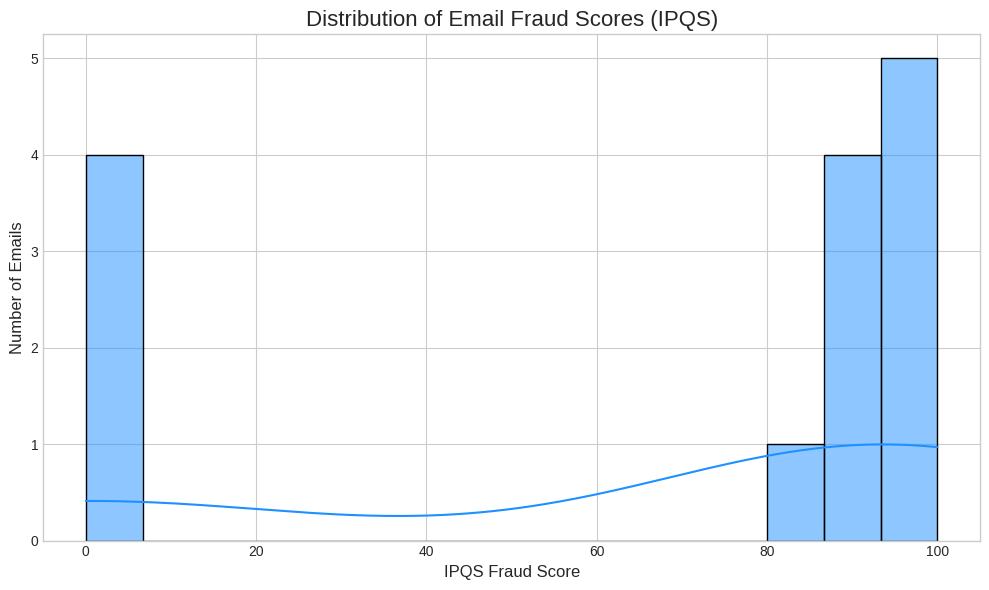

/tmp/ipython-input-21-1877510613.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df, order=risk_order, palette='plasma')


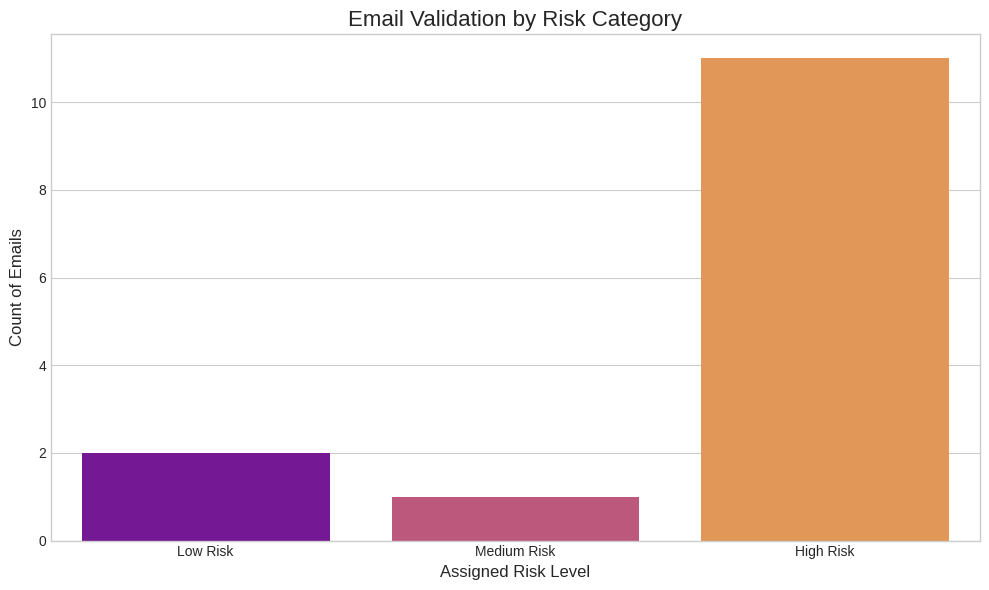

/tmp/ipython-input-21-1877510613.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=indicator_counts.index, y=indicator_counts.values, palette='Reds_d')


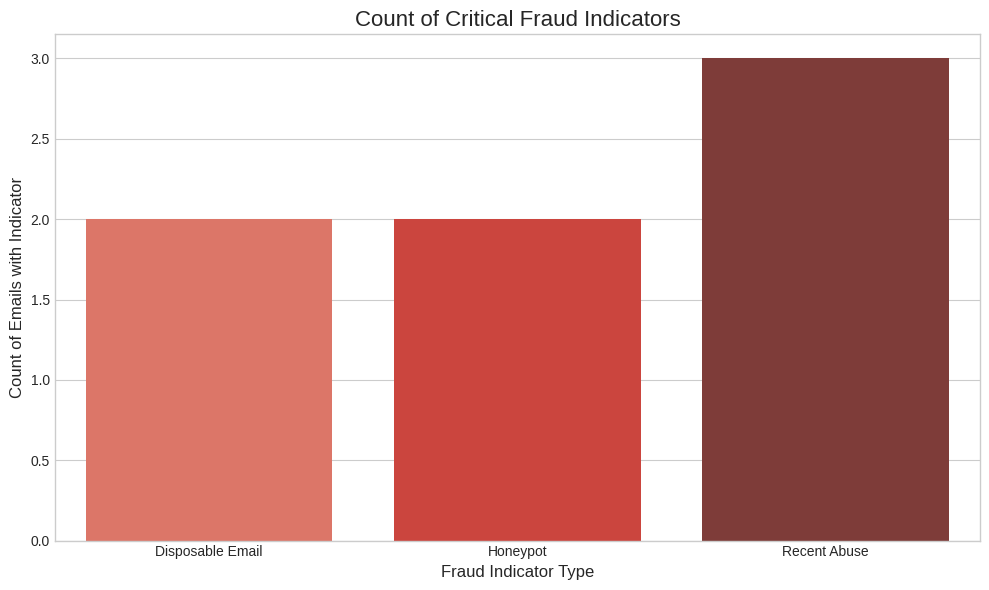

In [ ]:
df_final = analysis_df

# Plot main charts
if not analysis_df.empty:
    print("\n--- Fraud Analysis DataFrame ---")
    print(analysis_df[['email', 'is_valid', 'is_disposable', 'fraud_score', 'risk_level']])
    print("\n--- Value Counts for Risk Levels ---")
    print(analysis_df['risk_level'].value_counts())
    # Generate and display visualizations
    print("\nGenerating visualizations...")
    plot_score_distribution(analysis_df)
    plot_risk_levels(analysis_df)
    plot_fraud_indicators(analysis_df)
else:
    print("\nCould not retrieve or process data for analysis. Please check your API key and network.")


In [ ]:

#  Output table display
df_final


,email,is_valid,is_disposable,is_honeypot,has_recent_abuse,fraud_score,spam_score,first_seen_json,human,timestamp_days,risk_level
0,test.user@gmail.com,False,False,False,True,100,low,"{'human': '9 years ago', 'timestamp': 14832504...",9 years ago,3124,High Risk
1,legit.customer@yahoo.com,False,False,False,False,91,none,"{'human': '19 hours ago', 'timestamp': 1753127...",19 hours ago,0,High Risk
2,another.one@hotmail.com,False,False,False,False,91,none,"{'human': '9 years ago', 'timestamp': 14832504...",9 years ago,3124,High Risk
3,student123@outlook.com,True,False,False,False,80,none,"{'human': '19 hours ago', 'timestamp': 1753127...",19 hours ago,0,High Risk
4,contact@ipqualityscore.com,True,False,False,False,0,none,"{'human': '2 years ago', 'timestamp': 17056024...",2 years ago,550,Low Risk
5,test@trash-mail.com,False,True,False,True,100,low,"{'human': '9 years ago', 'timestamp': 14832504...",9 years ago,3124,High Risk
6,user@10minutemail.com,False,True,False,True,100,none,"{'human': '19 hours ago', 'timestamp': 1753127...",19 hours ago,0,High Risk
7,bademail@gmail.com,False,False,False,False,91,none,"{'human': '9 years ago', 'timestamp': 14832504...",9 years ago,3124,High Risk
8,thisisnota.valid.email@,False,False,False,False,91,none,"{'human': 'just now', 'timestamp': 1753197289,...",just now,0,High Risk
9,notauser@nonexistentdomain123.com,False,False,False,False,96,none,"{'human': '19 hours ago', 'timestamp': 1753127...",19 hours ago,0,High Risk
